In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Plotting the mixture of two Gaussians

In [2]:
pi = np.array([0.3, 0.7])   # mixing coefficients
assert np.isclose(pi.sum(), 1), "The mixing coefficients don't add up to 1"
mu = np.array([0.3, 0.8])    # means
sigma = np.array([0.1, 0.1])  # variances

In [3]:
xx = np.linspace(0, 1, 100)
p = np.zeros((2, 100), dtype=np.float64)

In [4]:
for n in range(len(pi)):
    p[n] = pi[n] * norm.pdf(xx, loc=mu[n], scale=sigma[n])
p_gmm = p.sum(axis=0)

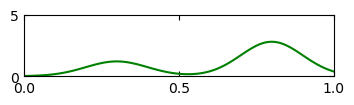

In [5]:
plt.figure(figsize=(4, 0.8))
plt.plot(xx, p_gmm, 'g')
plt.xticks([0, 0.5, 1])
plt.yticks([0, 5])
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.tick_params(direction='in', which='both', right=True, top=True)
plt.show()

In [6]:
x = np.loadtxt('02_24_data.txt')

# Plot histogram with multiple bin width

In [7]:
bin_widths = np.array([0.04, 0.08, 0.25])

In [8]:
bins = [np.arange(0, 1.04, 0.04),
        np.linspace(0, 1, 13),
        np.arange(0, 1.25, 0.25)]

In [9]:
def plot_histogram(x, bins):
    fig, ax = plt.subplots(3, 1, figsize=(5, 4))
    for i, bin_ in enumerate(bins):
        hist, bin_edges = np.histogram(x, bins=bin_, density=True)
        delta = bin_edges[1] - bin_edges[0]
        ax[i].bar(bin_edges[:-1], hist, align='edge', width=delta, edgecolor='k')
        
        ax[i].plot(xx, p_gmm, 'g', lw=2)
        ax[i].set_xticks([0, 0.5, 1])
        ax[i].set_yticks([0, 5])
        ax[i].set_xlim(0, 1)
        ax[i].set_ylim(0, 5)
        ax[i].tick_params(labelsize=10, direction='in', which='both', right=True, top=True)
        ax[i].text(0.05, 4, f'Δ = {delta:.2f}', fontsize=12)

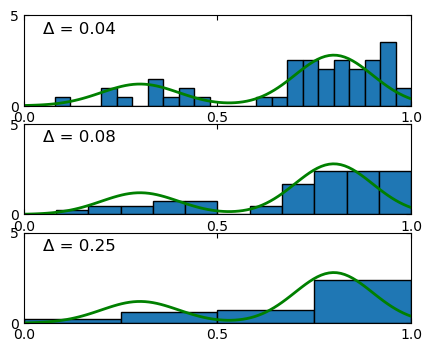

In [10]:
plot_histogram(x, bins)